In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)
X,Y = mnist['data'], mnist['target']
Y = Y.astype(np.uint8)
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28) # 원래 크기

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()
print('matched label : ', Y[0])

<Figure size 640x480 with 1 Axes>

matched label :  5


In [ ]:
from sklearn.svm import SVC

svm_clf = SVC() #OvO
svm_clf.fit(X_train, Y_train)
svm_clf.predict([some_digit])

/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)

print(np.argmax(some_digit_scores))

print(svm_clf.classes_)

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42,verbose = 2)
print('sgd classifier')
sgd_clf.fit(X_train, Y_train)
sgd_clf.predict([some_digit])

sgd classifier


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 6741.18, NNZs: 610, Bias: -138.379404, T: 60000, Avg. loss: 37725.222441
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 4186.60, NNZs: 626, Bias: -152.365495, T: 120000, Avg. loss: 4857.647073
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 3156.22, NNZs: 637, Bias: -159.234136, T: 180000, Avg. loss: 2838.456453
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 2661.63, NNZs: 642, Bias: -164.605999, T: 240000, Avg. loss: 1963.347777
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 2306.58, NNZs: 646, Bias: -168.293960, T: 300000, Avg. loss: 1484.022952
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 2045.08, NNZs: 646, Bias: -171.320734, T: 360000, Avg. loss: 1230.136950
Total training time: 0.47 seconds.
-- Epoch 7
Norm: 1839.52, NNZs: 646, Bias: -173.994142, T: 420000, Avg. loss: 1011.871135
Total training time: 0.55 seconds.
-- Epoch 8
Norm: 1672.88, NNZs: 646, Bias: -176.223825, T: 480000, Avg. loss: 900.268634
Total training time: 0.63 seconds.
-

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


Norm: 3007.83, NNZs: 599, Bias: -20.567811, T: 120000, Avg. loss: 2956.177441
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 2218.89, NNZs: 609, Bias: -21.815434, T: 180000, Avg. loss: 1641.305339
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 1872.03, NNZs: 614, Bias: -22.740286, T: 240000, Avg. loss: 1201.216221
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 1613.83, NNZs: 619, Bias: -23.757775, T: 300000, Avg. loss: 929.901419
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 1442.66, NNZs: 619, Bias: -24.281895, T: 360000, Avg. loss: 715.804275
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 1277.07, NNZs: 624, Bias: -24.669738, T: 420000, Avg. loss: 624.809254
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 1176.20, NNZs: 628, Bias: -25.089581, T: 480000, Avg. loss: 524.765614
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 1096.58, NNZs: 635, Bias: -25.420726, T: 540000, Avg. loss: 461.758354
Total training time: 0.72 seconds.
-- Epoch 10
Norm: 1029.3

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.7min finished


array(['3'], dtype='<U1')

In [6]:
sgd_clf.decision_function([some_digit])

array([[-3.16787929e+04, -3.43882125e+04, -9.28724667e+03,
         1.63999800e+07,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [8]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring = 'accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 8774.84, NNZs: 602, Bias: -133.873085, T: 39996, Avg. loss: 56682.572660
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 5668.42, NNZs: 611, Bias: -149.437542, T: 79992, Avg. loss: 7279.082836
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 4402.28, NNZs: 623, Bias: -156.774267, T: 119988, Avg. loss: 4211.837072
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3634.76, NNZs: 632, Bias: -162.088531, T: 159984, Avg. loss: 2872.844471
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 3134.37, NNZs: 635, Bias: -166.053071, T: 199980, Avg. loss: 2223.285192
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 2791.43, NNZs: 635, Bias: -169.290585, T: 239976, Avg. loss: 1814.984238
Total training time: 0.31 seconds.
-- Epoch 7
Norm: 2502.90, NNZs: 636, Bias: -171.879719, T: 279972, Avg. loss: 1519.039730
Total training time: 0.36 seconds.
-- Epoch 8
Norm: 2321.32, NNZs: 637, Bias: -174.079371, T: 319968, Avg. loss: 1228.405554
Total training time: 0.42 seconds.
-

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


Norm: 6784.74, NNZs: 568, Bias: -26.948308, T: 39996, Avg. loss: 26153.491684
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 4189.31, NNZs: 580, Bias: -30.136940, T: 79992, Avg. loss: 4284.494564
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 3138.02, NNZs: 582, Bias: -31.317677, T: 119988, Avg. loss: 2345.389344
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 2633.72, NNZs: 593, Bias: -31.925041, T: 159984, Avg. loss: 1646.447854
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 2273.50, NNZs: 597, Bias: -32.049780, T: 199980, Avg. loss: 1235.188833
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 1981.87, NNZs: 611, Bias: -32.201535, T: 239976, Avg. loss: 981.466661
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 1782.99, NNZs: 611, Bias: -32.455351, T: 279972, Avg. loss: 868.342322
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 1642.30, NNZs: 613, Bias: -32.482266, T: 319968, Avg. loss: 700.948877
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 1532.7

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9062.79, NNZs: 612, Bias: -159.807120, T: 40001, Avg. loss: 48947.237556
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 5817.80, NNZs: 624, Bias: -175.632754, T: 80002, Avg. loss: 7631.859992
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 4365.91, NNZs: 634, Bias: -184.286139, T: 120003, Avg. loss: 4186.172388
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3649.89, NNZs: 642, Bias: -190.522705, T: 160004, Avg. loss: 2953.872481
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 3182.00, NNZs: 642, Bias: -195.051243, T: 200005, Avg. loss: 2249.880570
Total training time: 0.27 seconds.
-- Epoch 6
Norm: 2838.02, NNZs: 644, Bias: -198.405069, T: 240006, Avg. loss: 1701.517935
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 2567.17, NNZs: 644, Bias: -201.125887, T: 280007, Avg. loss: 1450.814427
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 2372.70, NNZs: 647, Bias: -204.012066, T: 320008, Avg. loss: 1367.900546
Total training time: 0.43 seconds.
-

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


Norm: 6344.86, NNZs: 543, Bias: -19.903087, T: 40001, Avg. loss: 29074.027614
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 4161.49, NNZs: 572, Bias: -24.167189, T: 80002, Avg. loss: 4054.480022
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 3157.65, NNZs: 574, Bias: -26.154628, T: 120003, Avg. loss: 2487.644284
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 2675.41, NNZs: 585, Bias: -27.483054, T: 160004, Avg. loss: 1680.975791
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 2274.20, NNZs: 589, Bias: -28.942159, T: 200005, Avg. loss: 1287.018768
Total training time: 0.27 seconds.
-- Epoch 6
Norm: 2046.13, NNZs: 602, Bias: -29.662281, T: 240006, Avg. loss: 1077.847710
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 1835.05, NNZs: 603, Bias: -30.309880, T: 280007, Avg. loss: 878.977976
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 1692.92, NNZs: 605, Bias: -30.772789, T: 320008, Avg. loss: 708.276258
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 1554.

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9087.04, NNZs: 607, Bias: -177.468177, T: 40003, Avg. loss: 58128.618275
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 5722.64, NNZs: 620, Bias: -192.080093, T: 80006, Avg. loss: 7390.641021
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 4418.50, NNZs: 627, Bias: -200.653772, T: 120009, Avg. loss: 4128.893915
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3621.57, NNZs: 632, Bias: -206.062154, T: 160012, Avg. loss: 2951.826907
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 3160.22, NNZs: 633, Bias: -209.819267, T: 200015, Avg. loss: 2135.449017
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 2786.86, NNZs: 633, Bias: -213.051039, T: 240018, Avg. loss: 1799.468206
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 2557.43, NNZs: 633, Bias: -215.296216, T: 280021, Avg. loss: 1489.129860
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 2353.01, NNZs: 633, Bias: -217.568465, T: 320024, Avg. loss: 1313.259004
Total training time: 0.42 seconds.
-

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


Norm: 3141.60, NNZs: 595, Bias: -45.581677, T: 120009, Avg. loss: 2575.221375
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 2609.98, NNZs: 603, Bias: -46.777386, T: 160012, Avg. loss: 1895.534622
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 2260.71, NNZs: 608, Bias: -48.063061, T: 200015, Avg. loss: 1425.550451
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 1951.49, NNZs: 613, Bias: -48.854400, T: 240018, Avg. loss: 1132.130860
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 1780.36, NNZs: 613, Bias: -49.336279, T: 280021, Avg. loss: 967.857483
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 1623.56, NNZs: 614, Bias: -49.792675, T: 320024, Avg. loss: 846.521597
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 1515.23, NNZs: 615, Bias: -50.468307, T: 360027, Avg. loss: 689.275005
Total training time: 0.48 seconds.
-- Epoch 10
Norm: 1421.57, NNZs: 623, Bias: -50.538049, T: 400030, Avg. loss: 603.034025
Total training time: 0.53 seconds.
-- Epoch 11
Norm: 1333

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


array([0.87082583, 0.87089354, 0.88628294])

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, Y_train, cv=3, scoring = 'accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 302.04, NNZs: 717, Bias: -1368.337419, T: 39996, Avg. loss: 11.891350
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 247.96, NNZs: 717, Bias: -1330.905101, T: 79992, Avg. loss: 2.863415
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 235.67, NNZs: 717, Bias: -1308.142873, T: 119988, Avg. loss: 2.657111
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 228.56, NNZs: 717, Bias: -1292.278695, T: 159984, Avg. loss: 2.511251
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 228.09, NNZs: 717, Bias: -1279.389161, T: 199980, Avg. loss: 2.467821
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 223.89, NNZs: 717, Bias: -1269.648083, T: 239976, Avg. loss: 2.413864
Total training time: 0.31 seconds.
-- Epoch 7
Norm: 222.22, NNZs: 717, Bias: -1261.158954, T: 279972, Avg. loss: 2.366040
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 221.30, NNZs: 717, Bias: -1253.739283, T: 319968, Avg. loss: 2.357240
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 220.34, 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s remaining:    0.0s


Norm: 186.63, NNZs: 717, Bias: -1288.942619, T: 159984, Avg. loss: 1.236448
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 181.96, NNZs: 717, Bias: -1281.898709, T: 199980, Avg. loss: 1.175737
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 179.60, NNZs: 717, Bias: -1276.054098, T: 239976, Avg. loss: 1.175683
Total training time: 0.31 seconds.
-- Epoch 7
Norm: 177.92, NNZs: 717, Bias: -1271.074396, T: 279972, Avg. loss: 1.152797
Total training time: 0.36 seconds.
-- Epoch 8
Norm: 178.68, NNZs: 717, Bias: -1266.466136, T: 319968, Avg. loss: 1.140944
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 177.89, NNZs: 717, Bias: -1262.614424, T: 359964, Avg. loss: 1.131547
Total training time: 0.47 seconds.
-- Epoch 10
Norm: 177.61, NNZs: 717, Bias: -1259.115339, T: 399960, Avg. loss: 1.123791
Total training time: 0.52 seconds.
-- Epoch 11
Norm: 177.57, NNZs: 717, Bias: -1255.928404, T: 439956, Avg. loss: 1.115107
Total training time: 0.57 seconds.
-- Epoch 12
Norm: 177.26, NNZs: 7

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.1min finished
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 264.72, NNZs: 717, Bias: -1351.557310, T: 40001, Avg. loss: 10.050272
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 237.54, NNZs: 717, Bias: -1315.554666, T: 80002, Avg. loss: 2.486306
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 234.10, NNZs: 717, Bias: -1293.334106, T: 120003, Avg. loss: 2.304978
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 230.80, NNZs: 717, Bias: -1277.539422, T: 160004, Avg. loss: 2.191670
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 226.36, NNZs: 717, Bias: -1265.870475, T: 200005, Avg. loss: 2.136338
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 225.55, NNZs: 717, Bias: -1255.885201, T: 240006, Avg. loss: 2.070562
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 222.51, NNZs: 717, Bias: -1247.909603, T: 280007, Avg. loss: 2.009037
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 223.39, NNZs: 717, Bias: -1240.433709, T: 320008, Avg. loss: 2.000324
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 221.07, 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


Norm: 216.78, NNZs: 717, Bias: -1442.340597, T: 80002, Avg. loss: 1.586021
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 204.52, NNZs: 717, Bias: -1428.453061, T: 120003, Avg. loss: 1.414892
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 199.79, NNZs: 717, Bias: -1418.507610, T: 160004, Avg. loss: 1.373445
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 195.91, NNZs: 717, Bias: -1410.969527, T: 200005, Avg. loss: 1.333646
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 196.72, NNZs: 717, Bias: -1404.327942, T: 240006, Avg. loss: 1.325919
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 193.07, NNZs: 717, Bias: -1399.334359, T: 280007, Avg. loss: 1.287673
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 190.77, NNZs: 717, Bias: -1394.910345, T: 320008, Avg. loss: 1.290481
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 190.42, NNZs: 717, Bias: -1390.802808, T: 360009, Avg. loss: 1.284123
Total training time: 0.47 seconds.
-- Epoch 10
Norm: 192.33, NNZs: 717,

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 251.38, NNZs: 717, Bias: -1333.256425, T: 40003, Avg. loss: 10.508973
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 234.16, NNZs: 717, Bias: -1294.642595, T: 80006, Avg. loss: 2.744648
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 228.58, NNZs: 717, Bias: -1271.989281, T: 120009, Avg. loss: 2.556115
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 221.19, NNZs: 717, Bias: -1256.695340, T: 160012, Avg. loss: 2.464019
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 221.28, NNZs: 717, Bias: -1243.882128, T: 200015, Avg. loss: 2.379479
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 220.10, NNZs: 717, Bias: -1233.737947, T: 240018, Avg. loss: 2.351722
Total training time: 0.31 seconds.
-- Epoch 7
Norm: 219.50, NNZs: 717, Bias: -1225.096274, T: 280021, Avg. loss: 2.286154
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 216.58, NNZs: 717, Bias: -1218.069260, T: 320024, Avg. loss: 2.273087
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 216.35, 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


Norm: 212.96, NNZs: 717, Bias: -1501.526030, T: 120009, Avg. loss: 1.716377
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 211.53, NNZs: 717, Bias: -1490.227023, T: 160012, Avg. loss: 1.640435
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 209.47, NNZs: 717, Bias: -1481.695726, T: 200015, Avg. loss: 1.593029
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 204.19, NNZs: 717, Bias: -1475.314537, T: 240018, Avg. loss: 1.558292
Total training time: 0.31 seconds.
-- Epoch 7
Norm: 203.73, NNZs: 717, Bias: -1469.387339, T: 280021, Avg. loss: 1.554908
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 204.12, NNZs: 717, Bias: -1464.168466, T: 320024, Avg. loss: 1.530353
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 204.44, NNZs: 717, Bias: -1459.586351, T: 360027, Avg. loss: 1.527961
Total training time: 0.47 seconds.
-- Epoch 10
Norm: 204.53, NNZs: 717, Bias: -1455.527761, T: 400030, Avg. loss: 1.517968
Total training time: 0.52 seconds.
-- Epoch 11
Norm: 203.81, NNZs: 71

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.1min finished


array([0.89957009, 0.89344467, 0.89963495])

In [12]:
from sklearn.model_selection import cross_val_predict


y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, Y_train, cv=3)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 302.04, NNZs: 717, Bias: -1368.337419, T: 39996, Avg. loss: 11.891350
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 247.96, NNZs: 717, Bias: -1330.905101, T: 79992, Avg. loss: 2.863415
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 235.67, NNZs: 717, Bias: -1308.142873, T: 119988, Avg. loss: 2.657111
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 228.56, NNZs: 717, Bias: -1292.278695, T: 159984, Avg. loss: 2.511251
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 228.09, NNZs: 717, Bias: -1279.389161, T: 199980, Avg. loss: 2.467821
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 223.89, NNZs: 717, Bias: -1269.648083, T: 239976, Avg. loss: 2.413864
Total training time: 0.31 seconds.
-- Epoch 7
Norm: 222.22, NNZs: 717, Bias: -1261.158954, T: 279972, Avg. loss: 2.366040
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 221.30, NNZs: 717, Bias: -1253.739283, T: 319968, Avg. loss: 2.357240
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 220.34, 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s


Norm: 186.63, NNZs: 717, Bias: -1288.942619, T: 159984, Avg. loss: 1.236448
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 181.96, NNZs: 717, Bias: -1281.898709, T: 199980, Avg. loss: 1.175737
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 179.60, NNZs: 717, Bias: -1276.054098, T: 239976, Avg. loss: 1.175683
Total training time: 0.31 seconds.
-- Epoch 7
Norm: 177.92, NNZs: 717, Bias: -1271.074396, T: 279972, Avg. loss: 1.152797
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 178.68, NNZs: 717, Bias: -1266.466136, T: 319968, Avg. loss: 1.140944
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 177.89, NNZs: 717, Bias: -1262.614424, T: 359964, Avg. loss: 1.131547
Total training time: 0.47 seconds.
-- Epoch 10
Norm: 177.61, NNZs: 717, Bias: -1259.115339, T: 399960, Avg. loss: 1.123791
Total training time: 0.52 seconds.
-- Epoch 11
Norm: 177.57, NNZs: 717, Bias: -1255.928404, T: 439956, Avg. loss: 1.115107
Total training time: 0.57 seconds.
-- Epoch 12
Norm: 177.26, NNZs: 7

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.1min finished
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 264.72, NNZs: 717, Bias: -1351.557310, T: 40001, Avg. loss: 10.050272
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 237.54, NNZs: 717, Bias: -1315.554666, T: 80002, Avg. loss: 2.486306
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 234.10, NNZs: 717, Bias: -1293.334106, T: 120003, Avg. loss: 2.304978
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 230.80, NNZs: 717, Bias: -1277.539422, T: 160004, Avg. loss: 2.191670
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 226.36, NNZs: 717, Bias: -1265.870475, T: 200005, Avg. loss: 2.136338
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 225.55, NNZs: 717, Bias: -1255.885201, T: 240006, Avg. loss: 2.070562
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 222.51, NNZs: 717, Bias: -1247.909603, T: 280007, Avg. loss: 2.009037
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 223.39, NNZs: 717, Bias: -1240.433709, T: 320008, Avg. loss: 2.000324
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 221.07, 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


Norm: 216.78, NNZs: 717, Bias: -1442.340597, T: 80002, Avg. loss: 1.586021
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 204.52, NNZs: 717, Bias: -1428.453061, T: 120003, Avg. loss: 1.414892
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 199.79, NNZs: 717, Bias: -1418.507610, T: 160004, Avg. loss: 1.373445
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 195.91, NNZs: 717, Bias: -1410.969527, T: 200005, Avg. loss: 1.333646
Total training time: 0.27 seconds.
-- Epoch 6
Norm: 196.72, NNZs: 717, Bias: -1404.327942, T: 240006, Avg. loss: 1.325919
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 193.07, NNZs: 717, Bias: -1399.334359, T: 280007, Avg. loss: 1.287673
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 190.77, NNZs: 717, Bias: -1394.910345, T: 320008, Avg. loss: 1.290481
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 190.42, NNZs: 717, Bias: -1390.802808, T: 360009, Avg. loss: 1.284123
Total training time: 0.48 seconds.
-- Epoch 10
Norm: 192.33, NNZs: 717,

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 251.38, NNZs: 717, Bias: -1333.256425, T: 40003, Avg. loss: 10.508973
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 234.16, NNZs: 717, Bias: -1294.642595, T: 80006, Avg. loss: 2.744648
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 228.58, NNZs: 717, Bias: -1271.989281, T: 120009, Avg. loss: 2.556115
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 221.19, NNZs: 717, Bias: -1256.695340, T: 160012, Avg. loss: 2.464019
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 221.28, NNZs: 717, Bias: -1243.882128, T: 200015, Avg. loss: 2.379479
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 220.10, NNZs: 717, Bias: -1233.737947, T: 240018, Avg. loss: 2.351722
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 219.50, NNZs: 717, Bias: -1225.096274, T: 280021, Avg. loss: 2.286154
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 216.58, NNZs: 717, Bias: -1218.069260, T: 320024, Avg. loss: 2.273087
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 216.35, 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


Norm: 212.96, NNZs: 717, Bias: -1501.526030, T: 120009, Avg. loss: 1.716377
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 211.53, NNZs: 717, Bias: -1490.227023, T: 160012, Avg. loss: 1.640435
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 209.47, NNZs: 717, Bias: -1481.695726, T: 200015, Avg. loss: 1.593029
Total training time: 0.27 seconds.
-- Epoch 6
Norm: 204.19, NNZs: 717, Bias: -1475.314537, T: 240018, Avg. loss: 1.558292
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 203.73, NNZs: 717, Bias: -1469.387339, T: 280021, Avg. loss: 1.554908
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 204.12, NNZs: 717, Bias: -1464.168466, T: 320024, Avg. loss: 1.530353
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 204.44, NNZs: 717, Bias: -1459.586351, T: 360027, Avg. loss: 1.527961
Total training time: 0.48 seconds.
-- Epoch 10
Norm: 204.53, NNZs: 717, Bias: -1455.527761, T: 400030, Avg. loss: 1.517968
Total training time: 0.53 seconds.
-- Epoch 11
Norm: 203.81, NNZs: 71

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.1min finished


NameError: name 'confusion_matrix' is not defined

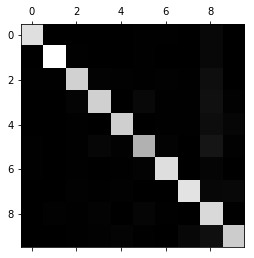

In [14]:
from sklearn.metrics import confusion_matrix



conf_mx = confusion_matrix(Y_train, y_train_pred)

plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

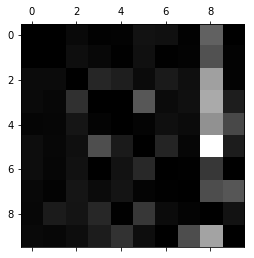

In [15]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/ipykernel_launcher.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/ipykernel_launcher.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/ipykernel_launcher.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


ZeroDivisionError: integer division or modulo by zero

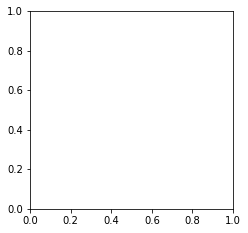

In [21]:

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
cl_a, cl_b = 3,5

X_aa = X_train[(Y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(Y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(Y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(Y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize = (8,8))

plt.subplot(221); plot_digits(X_aa[:25], images_per_row = 5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row = 5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row = 5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row = 5)

In [23]:
from sklearn.neighbors import KNeighborsClassifier


y_train_large = (Y_train >= 7)
y_train_odd = (Y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

TypeError: unorderable types: str() >= int()

In [ ]:
knn_clf.predict([some_digit])


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test


In [ ]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")